# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import pickle
from scipy.stats import kendalltau
from sklearn.preprocessing import MinMaxScaler

# **Data Loading**

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 693071
Jumlah kolom: 57


In [5]:
# Menghapus baris yang mengandung nilai NaN
data_cleaned = df.dropna()

data_cleaned

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


menghilangkan kolom yang terdapat null

In [6]:
data_cleaned.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

terlihat dari diatas sudah tidak ada nilai null di dataset

In [7]:
data_cleaned.duplicated().sum()

0

dilihat diatas tidak ada data yang duplicate

# **Exploratory Data Analysis (EDA)**

In [8]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


**menvisualisasikan rata-rata harga berdasarkan name**

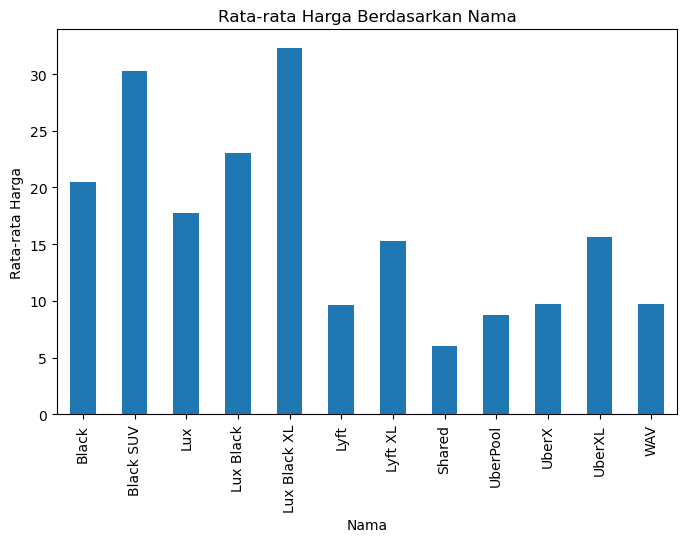

In [9]:
# Data yang telah dikelompokkan
grouped_data = data_cleaned.groupby('name')['price'].mean()

# Menampilkan visualisasi
plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar')
plt.title('Rata-rata Harga Berdasarkan Nama')
plt.xlabel('Nama')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=90)
plt.show()

terlihat bahwa dengan nama yang berbeda harga juga berbeda oleh karena itu ada kokrelasi antara kolom 'name' dan kolom 'price'

**memvisualisasikan rata-rata harga berdasarkan cab type**

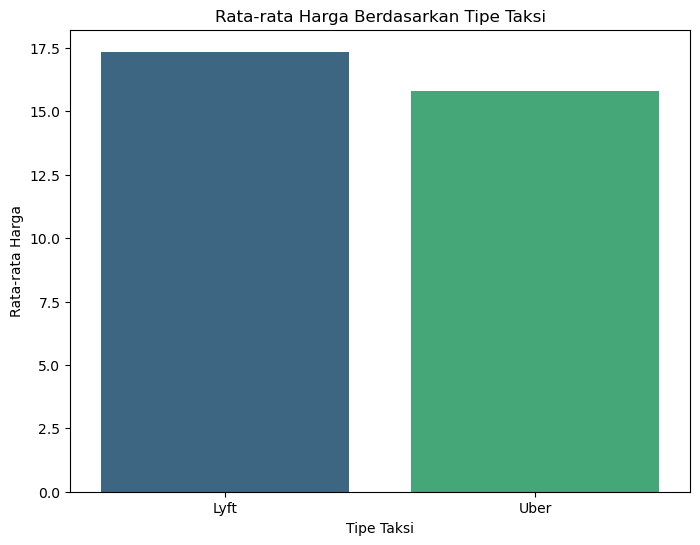

In [10]:
# Data yang telah dikelompokkan
grouped_data = data_cleaned.groupby('cab_type')['price'].mean().reset_index()

# Menampilkan visualisasi dengan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='cab_type', y='price', data=grouped_data, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Tipe Taksi')
plt.xlabel('Tipe Taksi')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=0)
plt.show()


terlihat dari visualisasi yang ditampilkan bahwa ada korelasi antara cab type dan price

**memvisualisasikan rata-rata harga berdasarkan jam dan surge multiplier**

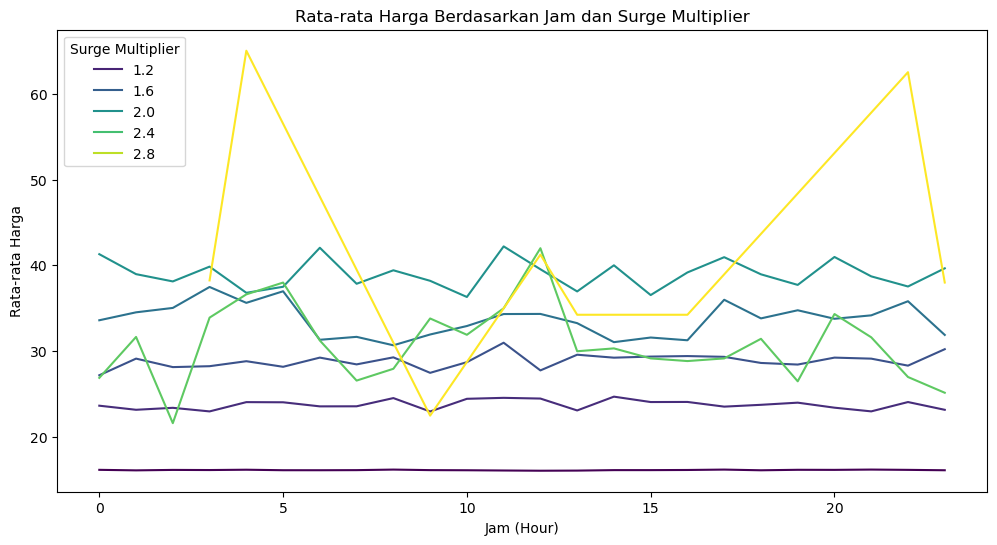

In [11]:
# Mengelompokkan data berdasarkan jam (hour) dan surge multiplier
grouped_data = data_cleaned.groupby(['hour', 'surge_multiplier'])['price'].mean().reset_index()

# Menampilkan visualisasi dengan Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='hour', y='price', hue='surge_multiplier', palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Jam dan Surge Multiplier')
plt.xlabel('Jam (Hour)')
plt.ylabel('Rata-rata Harga')
plt.legend(title='Surge Multiplier')
plt.show()

terlihat dari visualisasi diatas bahwa ada korelasi antara kolom price dengan kolom hour dan surge multiplier

**visualisasi perbandingan harga berdasarkan product id**

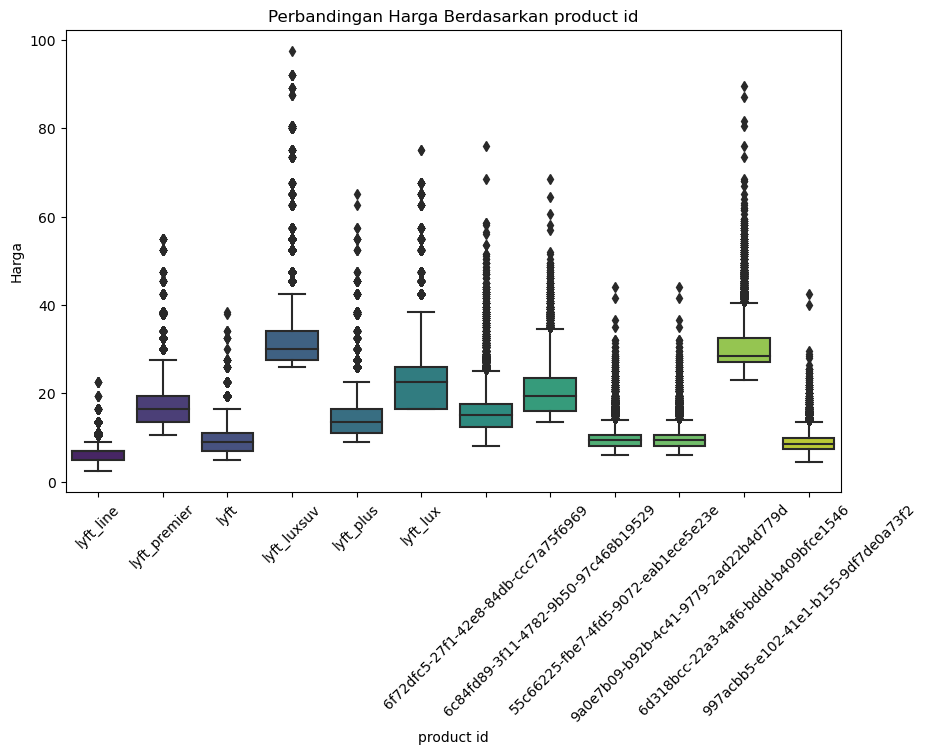

In [12]:
# Menampilkan visualisasi dengan Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_id', y='price', data=data_cleaned, palette='viridis')
plt.title('Perbandingan Harga Berdasarkan product id')
plt.xlabel('product id')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()


dari visualisasi diata setiap product id didapatkan harga yang berbeda beda oleh karena itu ada korelasi antara product id dan harga

**visualisasi rata-rata harga berdasarkan jarak**

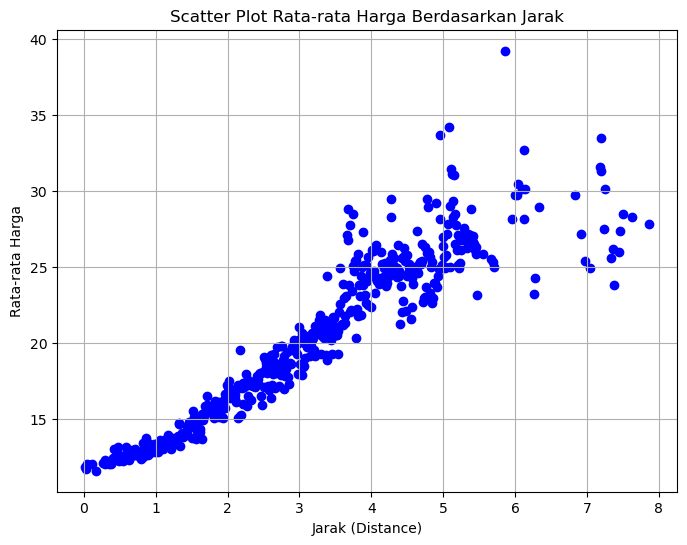

In [13]:
# Data yang telah dikelompokkan
grouped_data = data_cleaned.groupby('distance')['price'].mean().reset_index()

# Menampilkan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grouped_data['distance'], grouped_data['price'], c='blue', marker='o')
plt.title('Scatter Plot Rata-rata Harga Berdasarkan Jarak')
plt.xlabel('Jarak (Distance)')
plt.ylabel('Rata-rata Harga')
plt.grid(True)
plt.show()

dari visualisasi diatas terdapat korelasi antara harga dengan jarak dikarenakan setiap jarak didapat harga yang berbeda

# **Feature Engineering**

#### **Feature Selection**

melakukan pengujian korelasi dengan target kolom 'price' untuk dilihat tingkat korelasinya sebagai bahan untuk memilih feature yang akan digunakan

In [14]:
cat_cols = data_cleaned.select_dtypes(include=['object']).columns.tolist()
cat_cols

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [15]:
cat_dt = data_cleaned[cat_cols]
cat_dt

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


In [16]:
cat_dt['price'] = data_cleaned['price']
cat_dt['surge_multiplier'] = data_cleaned['surge_multiplier']
cat_dt['distance'] = data_cleaned['distance']

cat_dt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2984\52645982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_dt['price'] = data_cleaned['price']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2984\52645982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_dt['surge_multiplier'] = data_cleaned['surge_multiplier']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2984\52645982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,price,surge_multiplier,distance
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,5.0,1.0,0.44
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain,11.0,1.0,0.44
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night,7.0,1.0,0.44
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night,26.0,1.0,0.44
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,9.0,1.0,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.5,1.0,1.00
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,13.0,1.0,1.00
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.5,1.0,1.00
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,27.0,1.0,1.00


In [17]:
def cat_corr(col):
    corr_kendall, p_value = kendalltau(cat_dt[col], cat_dt['price'])
    print('Nama kolom:', col)
    print('Kendall Tau:', corr_kendall)
    print('P-Value:', p_value)

for column in cat_dt.columns:
    cat_corr(column)

Nama kolom: id
Kendall Tau: 0.0003143976537751096
P-Value: 0.7112678006144835
Nama kolom: datetime
Kendall Tau: -3.118763211216651e-05
P-Value: 0.9707102198259975
Nama kolom: timezone
Kendall Tau: nan
P-Value: nan
Nama kolom: source
Kendall Tau: -0.013055772826511497
P-Value: 2.3529257792795844e-49
Nama kolom: destination
Kendall Tau: -0.03151675812702735
P-Value: 2.33081827277028e-278
Nama kolom: cab_type
Kendall Tau: -0.057004480669791274
P-Value: 0.0
Nama kolom: product_id
Kendall Tau: 0.05077238589375829
P-Value: 0.0
Nama kolom: name
Kendall Tau: -0.39709440059363416
P-Value: 0.0
Nama kolom: short_summary
Kendall Tau: 0.00026118857283030585
P-Value: 0.7781422430770276
Nama kolom: long_summary
Kendall Tau: 0.0008231820404319457
P-Value: 0.3689918246431466
Nama kolom: icon
Kendall Tau: 0.0014072307863441582
P-Value: 0.13075349023039154
Nama kolom: price
Kendall Tau: 1.0
P-Value: 0.0
Nama kolom: surge_multiplier
Kendall Tau: 0.13715449743742802
P-Value: 0.0
Nama kolom: distance
Kendal

yang akan dijadikan feature adalah kolom cab_type, distance, surge_multiplier, name, dan product_id karena p-value yang dimiliki berada pada 0 menandakan data memiliki korelasi yang signifikan

In [18]:
df_final = data_cleaned[['distance','surge_multiplier','name','cab_type','product_id','price']]
df_final.head()

,distance,surge_multiplier,name,cab_type,product_id,price
0,0.44,1.0,Shared,Lyft,lyft_line,5.0
1,0.44,1.0,Lux,Lyft,lyft_premier,11.0
2,0.44,1.0,Lyft,Lyft,lyft,7.0
3,0.44,1.0,Lux Black XL,Lyft,lyft_luxsuv,26.0
4,0.44,1.0,Lyft XL,Lyft,lyft_plus,9.0


# **Handling Missing Value**

In [19]:
df_final.isna().sum()

distance            0
surge_multiplier    0
name                0
cab_type            0
product_id          0
price               0
dtype: int64

tidak ada missing value oleh karena itu tidak ada data yang di handling dan bisa lanjut memproses data

# **Split Data**

### **Split Feature (x) dan Target (y)**

In [20]:
X = df_final.drop(['price'], axis = 1)
y = df_final['price']
X

,distance,surge_multiplier,name,cab_type,product_id
0,0.44,1.0,Shared,Lyft,lyft_line
1,0.44,1.0,Lux,Lyft,lyft_premier
2,0.44,1.0,Lyft,Lyft,lyft
3,0.44,1.0,Lux Black XL,Lyft,lyft_luxsuv
4,0.44,1.0,Lyft XL,Lyft,lyft_plus
...,...,...,...,...,...
693065,1.00,1.0,WAV,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d
693066,1.00,1.0,UberXL,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
693067,1.00,1.0,UberX,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e
693069,1.00,1.0,Black SUV,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546


split data menjadi x dan y untuk dilakukan test

### **Split Data Train dan Data Test**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
print('Test size', y_train.shape)
print('Test size', y_test.shape)

X_train

Train size (446583, 5)
Test size (191393, 5)
Test size (446583,)
Test size (191393,)


,distance,surge_multiplier,name,cab_type,product_id
439220,1.36,1.0,Lux Black XL,Lyft,lyft_luxsuv
605833,3.22,1.0,UberPool,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2
324717,0.74,1.0,Lyft,Lyft,lyft
690755,0.72,1.0,UberPool,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2
664526,1.20,1.0,Lyft,Lyft,lyft
...,...,...,...,...,...
500045,1.79,1.0,WAV,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d
4241,0.61,1.0,UberXL,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
604200,3.14,1.0,Lyft XL,Lyft,lyft_plus
310474,2.12,1.0,UberPool,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2


memisahkan data menjadi data train dan data test

### **Split Data Numerical dan Categorical**

In [22]:
num_col = ['distance']
cat_col = ['surge_multiplier','name','cab_type','product_id']

In [23]:
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

X_train_num

,distance
439220,1.36
605833,3.22
324717,0.74
690755,0.72
664526,1.20
...,...
500045,1.79
4241,0.61
604200,3.14
310474,2.12


memisahkan data kategori dan numerical sesuai data yang dimiliki

### **Cardinality**

In [24]:
print('product_id       : {}'.format(len(df_final.product_id.unique())))
print('cab_type         : {}'.format(len(df_final.cab_type.unique())))
print('name             : {}'.format(len(df_final.name.unique())))
print('surge_multiplier : {}'.format(len(df_final.surge_multiplier.unique())))

product_id       : 12
cab_type         : 2
name             : 12
surge_multiplier : 7


Dari pengecekan cardinalitas tidak ada high cardinality oleh karena itu tidak diperlukan pengurangan cardinality

### **Outlier Handling**

#### **Skewnes**

In [25]:
# cek skewness dari feature 'distance'
X_train['distance'].skew()

0.8163084022263418

disimpulkan bahwa sebaran data distance adalah skew dikarenakan didapat 0.816 setelah pengecekan

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


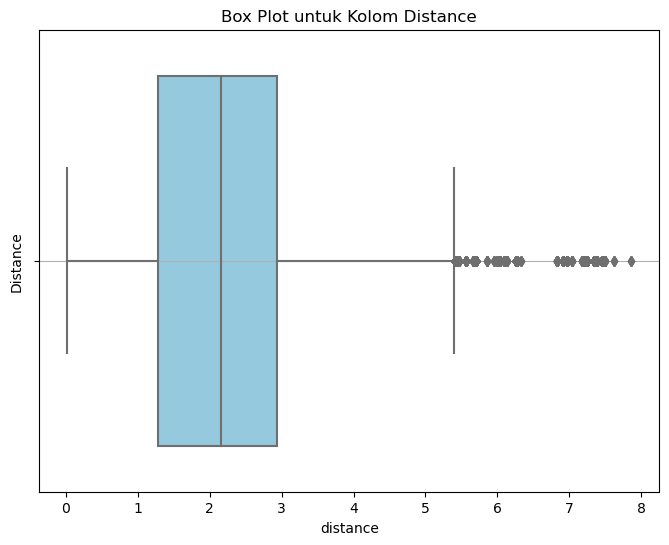

In [26]:
# Visualisasi dengan box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train, x='distance', orient='v', color='skyblue')
plt.title('Box Plot untuk Kolom Distance')
plt.ylabel('Distance')
plt.grid(axis='y')
plt.show()

dari visualisasi diatas terdapat outlier dan akan saya handling

In [27]:

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary
upper_boundary_fare, lower_boundary_fare = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_boundary_fare, lower_boundary_fare

(5.405, -1.195)

didapatkan batas bawah adalah -1.195 dan batas atas 5.405

In [28]:
print('Total data distance              : {}'.format(len(X_train)))
print('Distance that more than 5.405    : {}'.format(len(X_train[X_train['distance'] > upper_boundary_fare])))
print('% Distance that more than 5.405  : {}'.format(len(X_train[X_train['distance'] > upper_boundary_fare])/len(X_train) * 100))

Total data distance              : 446583
Distance that more than 5.405    : 5055
% Distance that more than 5.405  : 1.1319284433128893


In [29]:
winsoriser_distance = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['distance'])

winsoriser_distance.fit(X_train_num)

X_train_capped = winsoriser_distance.fit_transform(X_train_num)
X_test_capped = winsoriser_distance.transform(X_test_num)
winsoriser_distance.right_tail_caps_

{'distance': 5.405}

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


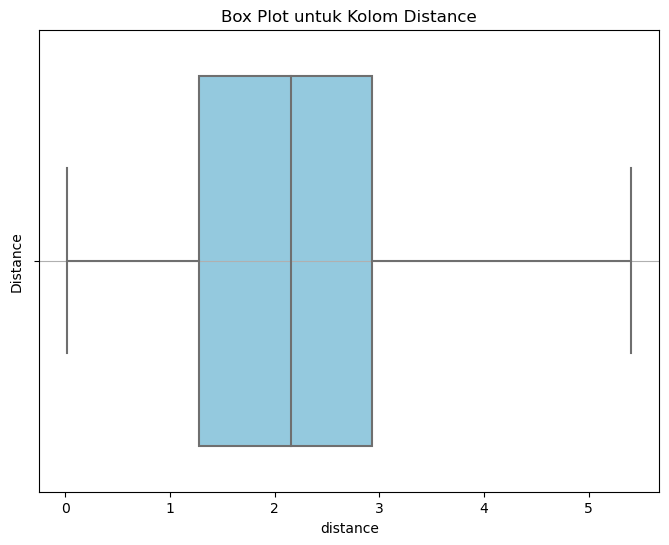

In [30]:
# Visualisasi dengan box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train_capped, x='distance', orient='v', color='skyblue')
plt.title('Box Plot untuk Kolom Distance')
plt.ylabel('Distance')
plt.grid(axis='y')
plt.show()

dilihat dari boxplot outlier sudah dihilangkan

### **Feature Scaling**

In [31]:
scaler = MinMaxScaler() 
scaler.fit(X_train_capped) 
X_train_num_scaled = scaler.fit_transform(X_train_capped) 
X_test_num_scaled = scaler.transform(X_test_capped)

X_test_num_scaled

array([[0.47168059],
       [0.40482823],
       [0.55524605],
       ...,
       [0.13184773],
       [0.24698236],
       [0.07799443]])

### **One Hot Encoding**

In [32]:
enc = OneHotEncoder(sparse=False) 
encode_train = enc.fit_transform(X_train_cat[['surge_multiplier','name','cab_type','product_id']]) 
encode_test = enc.transform(X_test_cat[['surge_multiplier','name','cab_type','product_id']])
encode_train

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### **Concate**

In [33]:
X_train_final = np.concatenate([encode_train, X_train_num_scaled], axis = 1)
X_test_final = np.concatenate([encode_test, X_test_num_scaled], axis = 1)

In [34]:
X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.248839
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594243
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133705
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129991
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.219127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328691
446579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109564
446580,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.579387
446581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389972


# **Model Definition**

In [35]:
model_lin_reg = LinearRegression()

# **Model Training**

In [36]:
model_kondisi = model_lin_reg.fit(X_train_final, y_train)
y_pred1 = model_kondisi.predict(X_test_final)

# **Model Evaluation**

In [37]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([29.24108887, 11.77191162,  4.73101807, ..., 17.37316895,
        8.5994873 ,  3.78387451])

In [38]:
y_train

439220    26.0
605833     9.0
324717     7.0
690755     6.5
664526     7.0
          ... 
500045     9.5
4241      16.0
604200    16.5
310474     8.5
40290      5.0
Name: price, Length: 446583, dtype: float64

**MAE**

In [39]:
print('Error - Train set : ', mean_absolute_error(y_pred_train, y_train))
print('Error - Test set : ', mean_absolute_error(y_pred_test, y_test))

Error - Train set :  1.7795042084557733
Error - Test set :  1.779974976915749


Hasil Error test menunjukan angka 1.779 yang termasuk kecil untuk error 

**R-Squared**

In [40]:
r1 = r2_score (y_train,y_pred_train)
r2 = r2_score(y_test,y_pred_test)

print(f'Nilai R2 pada train set = {r1}')
print(f'Nilai R2 pada test set = {r2}')

Nilai R2 pada train set = 0.9278214300663301
Nilai R2 pada test set = 0.9281710730934857


didapat hasil dari R2 pada train set adalah 92,7 dan pada test set didapatkan 92,8 disimpulkan bahwa model sudah akurat

**MSE**

In [41]:
print("MSE Train Set",mean_squared_error(y_train,y_pred_train))
print("MSE Test Set",mean_squared_error(y_test,y_pred_test))

MSE Train Set 6.2702520500255465
MSE Test Set 6.257058858897052


didapat hasil mse dari model adalah 6.257421495964125 apabila nilai mse semakin rendah maka model semakin bagus dalam memprediksi data

**RMSE**

In [42]:
print("RMSE Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE Test",np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE Train 2.50404713414615
RMSE Test 2.5014113733844443


nilai RMSE sebesar 2.5014838588254222 menunjukkan bahwa model memiliki kesalahan sekitar 2.5014838588254222 unit

# **Model Saving**

In [43]:
with open('model_scaler1.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) 

with open('model_encoder1.pkl', 'wb') as file_2:
  pickle.dump(enc, file_2) 

with open('model_lin_reg1.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3) 

**Load Model**

In [44]:

# Memuat model skalar dari berkas
with open('model_scaler1.pkl', 'rb') as file_1:
    scaler = pickle.load(file_1)

# Memuat model label encoder dari berkas
with open('model_encoder1.pkl', 'rb') as file_2:
    enc = pickle.load(file_2)

# Memuat model regresi linear dari berkas
with open('model_lin_reg1.pkl', 'rb') as file_3:
    model_lin_reg = pickle.load(file_3)

# **Model Inference**

In [45]:
data_inf = {
    'distance' : 3.14,
    'surge_multiplier' : 1.0,
    'name' : 'Lyft',
    'cab_type' : 'Uber',
    'product_id' : 'lyft_line'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,distance,surge_multiplier,name,cab_type,product_id
0,3.14,1.0,Lyft,Uber,lyft_line


In [46]:
#split between numerical and categorical columns

data_inf_num = data_inf[num_col]
data_inf_cat = data_inf[cat_col]
data_inf_num

,distance
0,3.14


In [47]:
#feature scaling and encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = enc.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis = 1)

In [48]:
#predict using linear reg model

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([4.50527905e+11])

hasil prediksi yang didapat adalah 4.50527905e+11

# **Kesimpulan**

kesimpulan yang didapat adalah hasil dari train model dengan R-squared didapat 92 persen dan dengan mse didaptkan hasil 6.2702520500255465 bisa disimpulkan bahwa model yang kita buat sudah bagus dikarenakan keakuratannya sudah sampai 92 persen

# **Conceptual Problem**

**Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)**

- Assumption 1 Linear Relationship : Linear Regression adalah bahwa hubungan antara variabel independen (fitur) dan variabel dependen (target) adalah linier
- Assumption 2 No or Little Multicollinearity :Korelasi antara masing-masing variabel independen (fitur) dan variabel dependen (target) harus kuat
- Assumption 3 Multivariate Normality : dapat memprediksi observasi dan membandingkan hasil aktual (y) dengan hasil prediksi (ŷ). Selisih antara hasil aktual dan hasil prediksi disebut residu
- Assumption 4 No Auto-Correlation : Tidak ada korelasi serial (autokorelasi) antara residual. Ini berarti bahwa tidak ada pola korelasi sistematis antara residual yang bersifat berurutan
- Assumption 5 Homoscedasticity :  Asumsi ini mengacu pada konsistensi varians kesalahan di seluruh berbagai nilai prediksi. Dalam kata lain, varian dari residual harus konstan


**Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !**

In [49]:
coef2 = model_kondisi.coef_
intercept = model_kondisi.intercept_
print("Nilai intercept:", intercept)
print("Nilai slope:", coef2)


Nilai intercept: -314874878919.4128
Nilai slope: [ 1.40908017e+11  1.40908017e+11  1.40908017e+11  1.40908017e+11
  1.40908017e+11  1.40908017e+11  1.40908017e+11  4.68416462e+10
  2.51909575e+10  9.24986286e+10  6.66881023e+10  5.37206467e+10
  9.50226968e+11  3.54183386e+11 -7.51508491e+10  2.41217933e+11
  9.25745404e+10  2.50362908e+12 -5.92806239e+11 -1.74628392e+10
  1.74628392e+10  6.39294825e+10  1.09662377e+11  1.31313065e+11
 -2.34712506e+12 -8.47139103e+10  7.49310262e+11 -7.58797266e+11
  2.66580550e+11  1.24741599e+11  1.37709055e+11 -1.62753684e+11
  9.89310726e+10  1.55307076e+01]


nilai intercept yang didapat adalah -314874878919.4128, dan nilai slope yang didapat sangat besar oleh karena itu hasil yang didapat tidak terlalu bermakna dikarenakan nilai intercept dan nilai slope yang didapat sangat besar.